In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# Import libraries
import matplotlib as mpl
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA

In [11]:
df = pd.read_csv("data/Eenrgy-demand.csv",parse_dates=['Year'], index_col='Year')
df.head()

,Demand,Population,GDP
Year,,,
1994-01-01,2038,117,300
1995-01-01,2220,119,329
1996-01-01,2419,120,395
1997-01-01,2638,127,401
1998-01-01,2881,128,407


In [12]:
df.dtypes

Demand        int64
Population    int64
GDP           int64
dtype: object

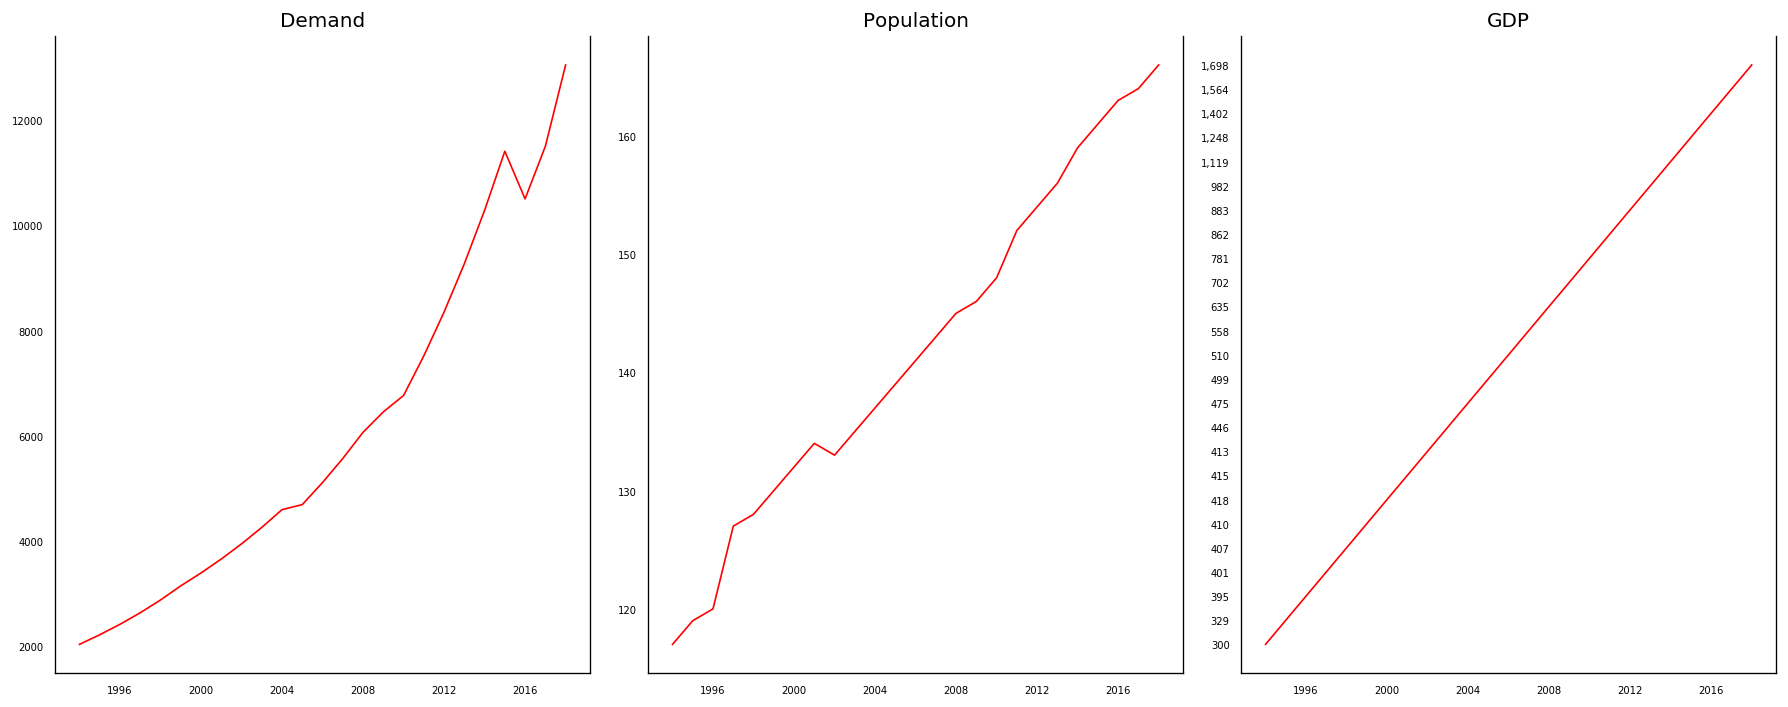

In [28]:
#visualize the data
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=120, figsize=(15,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

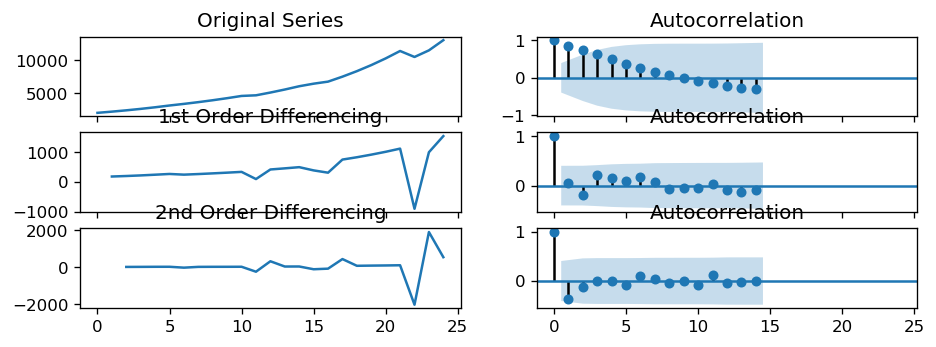

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv("data/Eenrgy-demand.csv")

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Demand); axes[0, 0].set_title('Original Series')
plot_acf(df.Demand, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Demand.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Demand.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Demand.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Demand.diff().diff().dropna(), ax=axes[2, 1])



plt.show()

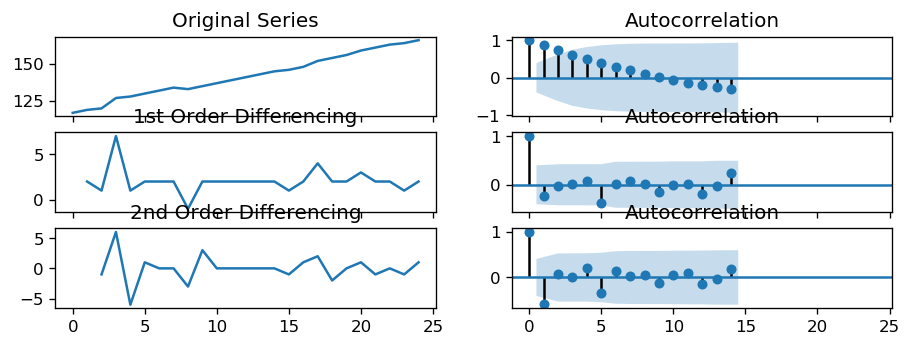

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv("data/Eenrgy-demand.csv")

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Population); axes[0, 0].set_title('Original Series')
plot_acf(df.Population, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Population.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Population.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Population.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Population.diff().diff().dropna(), ax=axes[2, 1])



plt.show()

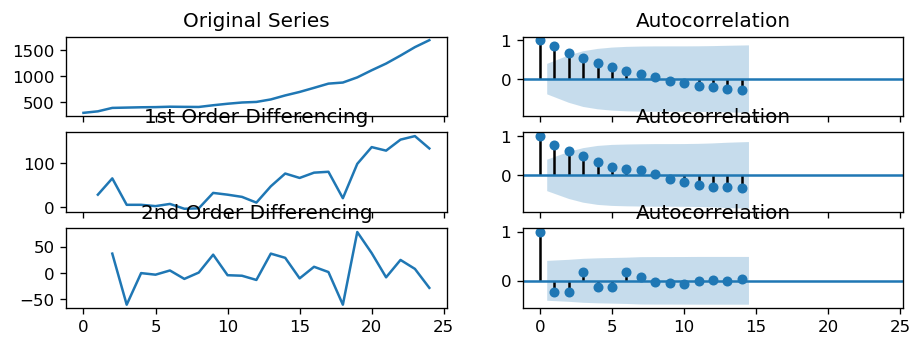

In [10]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv("data/Eenrgy-demand.csv")

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.GDP); axes[0, 0].set_title('Original Series')
plot_acf(df.GDP, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.GDP.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.GDP.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.GDP.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.GDP.diff().diff().dropna(), ax=axes[2, 1])



plt.show()

# Granger’s causality tests 

Null hypothesis(H0): that the coefficients of past values in the regression equation is zero.

In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

interpret the p-values:-

If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

In [24]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=7
#variables=['Year','']
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

,Demand_x,Population_x,GDP_x
Demand_y,1.0,0.0027,0.0000
Population_y,0.0,1.0000,0.0004
GDP_y,0.0,0.0000,1.0000


In [26]:
#Splitting the dataset into training and test data.
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (21, 3)
print(df_test.shape)  # (4, 3)

(21, 3)
(4, 3)


In [27]:
#check the data is stationary or not using unit root test[Augmented Dickey-Fuller Test]

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

In [28]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Demand" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6161
 No. Lags Chosen       = 5
 Critical value 1%     = -3.964
 Critical value 5%     = -3.085
 Critical value 10%    = -2.682
 => P-Value = 0.8673. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Population" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.1921
 No. Lags Chosen       = 0
 Critical value 1%     = -3.809
 Critical value 5%     = -3.022
 Critical value 10%    = -2.651
 => P-Value = 0.9395. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has 

In [29]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [30]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Demand" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.9599
 No. Lags Chosen       = 7
 Critical value 1%     = -4.138
 Critical value 5%     = -3.155
 Critical value 10%    = -2.714
 => P-Value = 0.9986. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Population" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2476
 No. Lags Chosen       = 0
 Critical value 1%     = -3.833
 Critical value 5%     = -3.031
 Critical value 10%    = -2.656
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.

In [33]:
# Second Differencing
df_differenced2 = df_differenced.diff().dropna()

In [34]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Demand" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3524
 No. Lags Chosen       = 3
 Critical value 1%     = -4.012
 Critical value 5%     = -3.104
 Critical value 10%    = -2.691
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Population" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8682
 No. Lags Chosen       = 6
 Critical value 1%     = -4.223
 Critical value 5%     = -3.189
 Critical value 10%    = -2.73
 => P-Value = 0.0492. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level  

In [35]:
# Third Differencing
df_differenced3 = df_differenced2.diff().dropna()

In [36]:
# ADF Test on each column of 3nd Differences Dataframe
for name, column in df_differenced3.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Demand" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0593
 No. Lags Chosen       = 6
 Critical value 1%     = -4.332
 Critical value 5%     = -3.233
 Critical value 10%    = -2.749
 => P-Value = 0.2612. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Population" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1737
 No. Lags Chosen       = 6
 Critical value 1%     = -4.332
 Critical value 5%     = -3.233
 Critical value 10%    = -2.749
 => P-Value = 0.2159. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has 

In [39]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  18.886511610399655
BIC :  19.48009278233043
FPE :  162979282.3092323
HQIC:  18.968358450135224 

Lag Order = 2
AIC :  17.84850543611814
BIC :  18.877768978775816
FPE :  65944458.83404746
HQIC:  17.9508162620323 

Lag Order = 3
AIC :  17.78061184381106
BIC :  19.22921569801065
FPE :  100898240.81046687
HQIC:  17.854792245829408 

Lag Order = 4
AIC :  -19.310210855935765
BIC :  -17.469280333070017
FPE :  6.219203705068083e-08
HQIC:  -19.329820612588513 

Lag Order = 5
AIC :  -173.27645138218466
BIC :  -171.08539768064662
FPE :  -1.9826579401822285e-75
HQIC:  -173.4792734534256 

Lag Order = 6
AIC :  -172.04966226367443
BIC :  -169.57257661942
FPE :  -4.491058537179034e-77
HQIC:  -172.55881489742177 

Lag Order = 7
AIC :  -172.67868606780561
BIC :  -170.0116994939716
FPE :  -6.664950812212704e-79
HQIC:  -173.66610004078703 

Lag Order = 8
AIC :  -175.4770482037632
BIC :  -172.76412588922884
FPE :  -1.2578017053090052e-81
HQIC:  -177.18716570934924 

Lag Order = 9
AIC 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [44]:
model_fitted = model.fit(5)
model_fitted.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1374: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Apr, 2020
Time:                     21:20:58
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -171.085
Nobs:                     14.0000    HQIC:                  -173.479
Log likelihood:           1201.34    FPE:               -1.98266e-75
AIC:                     -173.276    Det(Omega_mle):    -2.01497e-76
--------------------------------------------------------------------
Results for equation Demand
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -6.743807         0.000004     -1603537.262           0.000
L1.Demand             0.622953         0.000000     16476137.321           0.000
L1.Population         0.865877              NAN            

In [45]:
model_fitted = model.fit(6)
model_fitted.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1374: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Apr, 2020
Time:                     21:21:26
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -169.573
Nobs:                     13.0000    HQIC:                  -172.559
Log likelihood:           1119.98    FPE:               -4.49106e-77
AIC:                     -172.050    Det(Omega_mle):    -3.01113e-78
--------------------------------------------------------------------
Results for equation Demand
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -2.669686         0.000016      -168482.601           0.000
L1.Demand            -1.289509         0.000000     -6780781.362           0.000
L1.Population        -4.519723              NAN            

In [46]:
model_fitted = model.fit(7)
model_fitted.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1374: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Apr, 2020
Time:                     21:22:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -170.012
Nobs:                     12.0000    HQIC:                  -173.666
Log likelihood:           1050.99    FPE:               -6.66495e-79
AIC:                     -172.679    Det(Omega_mle):    -2.93025e-80
--------------------------------------------------------------------
Results for equation Demand
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.159962              NAN              NAN             NAN
L1.Demand            -0.369769         0.000000     -3277438.887           0.000
L1.Population        -0.616297              NAN            

In [47]:
model_fitted = model.fit(8)
model_fitted.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1374: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Apr, 2020
Time:                     21:23:56
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -172.764
Nobs:                     11.0000    HQIC:                  -177.187
Log likelihood:           993.299    FPE:               -1.25780e-81
AIC:                     -175.477    Det(Omega_mle):    -3.58825e-83
--------------------------------------------------------------------
Results for equation Demand
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.418083         0.000001       290066.776           0.000
L1.Demand            -0.572799              NAN              NAN             NAN
L1.Population        -0.182785              NAN            

In [49]:
#Check for Serial Correlation of Residuals (Errors) using the Durbin Watson’s Statistic.
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Demand : 2.49
Population : 1.07
GDP : 2.75


In [50]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

8


array([[  38.,    0.,   37.],
       [  40.,    0.,   29.],
       [-109.,   -1.,  -10.],
       [ -77.,    1.,   12.],
       [ 442.,    2.,    2.],
       [  78.,   -2.,  -60.],
       [  88.,    0.,   78.],
       [  96.,    1.,   38.]])

In [51]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Demand_2d,Population_2d,GDP_2d
Year,,,
2015-01-01,-680.161329,3.806154,-11.638842
2016-01-01,617.887947,1.328267,-205.860695
2017-01-01,591.898035,-1.960947,-59.365148
2018-01-01,432.045749,2.835329,226.530958


In [52]:
#Invert the transformation to get the real forecast

def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [54]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Demand_forecast', 'Population_forecast', 'GDP_forecast']]

,Demand_forecast,Population_forecast,GDP_forecast
Year,,,
2015-01-01,10617.838671,165.806154,1244.361158
2016-01-01,11570.565289,173.940575,1163.861621
2017-01-01,13115.189943,180.114048,1023.996936
2018-01-01,15091.860346,189.122851,1110.663208


In [56]:
df.tail(4)

,Demand,Population,GDP
Year,,,
2015-01-01,11405,161,1248
2016-01-01,10500,163,1402
2017-01-01,11500,164,1564
2018-01-01,13044,166,1698


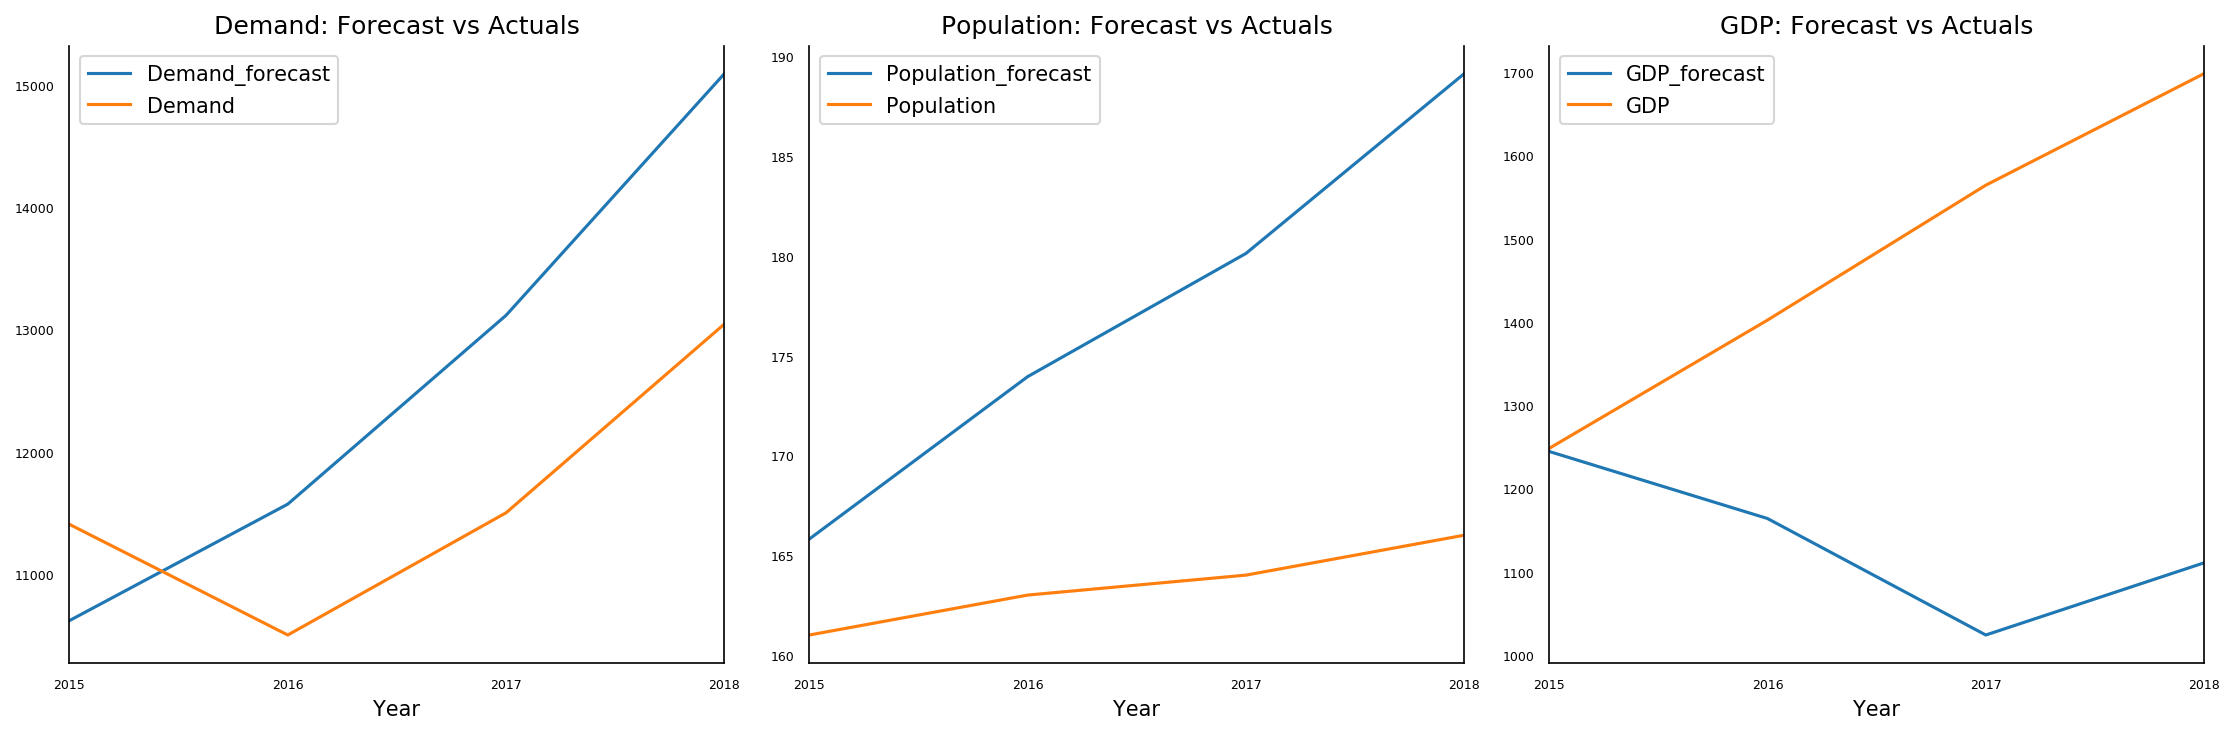

In [61]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=3, dpi=150, figsize=(15,5))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [63]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Demand')
accuracy_prod = forecast_accuracy(df_results['Demand_forecast'].values, df_test['Demand'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Population')
accuracy_prod = forecast_accuracy(df_results['Population_forecast'].values, df_test['Population'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: GDP')
accuracy_prod = forecast_accuracy(df_results['GDP_forecast'].values, df_test['GDP'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))



Forecast Accuracy of: Demand
mape :  0.1171
me :  986.6136
mae :  1380.1942
mpe :  0.0826
rmse :  1463.5832
corr :  0.8184
minmax :  0.1051

Forecast Accuracy of: Population
mape :  0.0836
me :  13.7459
mae :  13.7459
mpe :  0.0836
rmse :  15.3062
corr :  0.9978
minmax :  0.0759

Forecast Accuracy of: GDP
mape :  0.216
me :  -342.2793
mae :  342.2793
mpe :  -0.216
rmse :  416.3205
corr :  -0.7788
minmax :  0.216


### Try to build another way

In [74]:
# Get the lag order
lag_order =9
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

9


array([[ 323.,    0.,  -13.],
       [  38.,    0.,   37.],
       [  40.,    0.,   29.],
       [-109.,   -1.,  -10.],
       [ -77.,    1.,   12.],
       [ 442.,    2.,    2.],
       [  78.,   -2.,  -60.],
       [  88.,    0.,   78.],
       [  96.,    1.,   38.]])

In [75]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Demand_2d,Population_2d,GDP_2d
Year,,,
2015-01-01,-680.161329,3.806154,-11.638842
2016-01-01,617.887947,1.328267,-205.860695
2017-01-01,591.898035,-1.960947,-59.365148
2018-01-01,432.045749,2.835329,226.530958


In [76]:
#Invert the transformation to get the real forecast

def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [77]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Demand_forecast', 'Population_forecast', 'GDP_forecast']]

,Demand_forecast,Population_forecast,GDP_forecast
Year,,,
2015-01-01,10617.838671,165.806154,1244.361158
2016-01-01,11570.565289,173.940575,1163.861621
2017-01-01,13115.189943,180.114048,1023.996936
2018-01-01,15091.860346,189.122851,1110.663208


### Similar Outpur